# Obtenção de raio de nanopartículas de sílica de imagem de Microscópio Eletrônico de Varredura (MEV)

Nesta prática, vocês analisarão uma imagem de MEV, das nanopartículas de sílica que vocês sintetizaram e obtiveram as imagens no LNNano.

Para isso, utilizaremos a biblioteca OpenCV para Python.

O procedimento consiste no seguinte:
 - Abrir uma das imagens obtidas.
 - Aplicar um filtro para deixá-la em preto e branco.
 - Aplicar um filtro Gaussiano, para diminuir o ruído da imagem.
 - Então, com a função HoughCircles do OpenCV, são buscados círculos na imagem.
 - Por fim o arquivo original, com o filtro Gaussiano e outro com os círculos encontrados são mostrados.
 - **IMPORTANTE:** Para não travar seu Kernel, não feche as imagens no 'x', apenas aperte qualquer tecla do teclado quando a janela da imagem estiver ativa.

A seguir entramos em mais detalhes de cada passo a ser realizado.

## Filtro Gaussiano

Como a imagem tem duas dimensões, devemos aplicar um filtro Gaussiano 2D, que é definido pela seguinte expressão:
![Filtro Gaussiano](https://wikimedia.org/api/rest_v1/media/math/render/svg/6717136818f2166eba2db0cfc915d732add9c64f "Filtro Gaussiano")
Basicamente um produto de duas funções Gaussianas, uma para *x* e uma para *y*. O parâmetro importante para ajustarmos é o desvio padrão, quanto maior o desvio, mais os pixels vizinhos serão misturados. Portanto, como há uma mistura de pixels vizinhos, isso leva a imagem a ficar borrada, como mostrado na figura abaixo:
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/62/Cappadocia_Gaussian_Blur.svg/500px-Cappadocia_Gaussian_Blur.svg.png" width="200">

Isso pode não parecer útil, pois o exemplo é dado com uma imagem nítida. Porém, se aplicarmos em uma imagem com ruído, que é o caso das imagens de microscopia eletrônica, isso passa a fazer mais sentido. Vejam o exemplo abaixo, para notarem como o ruído pode diminuir muito com o filtro Gaussiano:
<img src="https://upload.wikimedia.org/wikipedia/commons/d/d7/Halftone%2C_Gaussian_Blur.jpg" width="200">

Agora a imagem fica melhor de ser vista, pois não está mais pontilhada como a original. Para isso que utilizaremos o filtro nas imagens de MEV. Porém, não podemos aplicar um desvio padrão muito grande, pois assim perdemos detalhes e os contornos das nanopartículas não serão detectados. A biblioteca OpenCV, para ser mais eficiente, utiliza o método de gradiente de Hough, 

## Encontrando os círculos

Para encontrarmos os círculos, basicamente precisamos tentar fazer um ajuste de círculos em todos os pontos da imagem. A equação de um círculo é a seguinte:
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/5ca87c9e434b6b4af58515e9a1b059430fe180de" width="300">

Nesta equação, *a* e *b* são o centro do círculo, *r* é o raio. Então, para cada ponto *(x,y)*, tentamos ajustar um círculo. Parece simples, mas é um processo exaustivo e demanda muitos recursos computacionais. A biblioteca OpenCV utiliza o método de gradiente de Hough, que acelera bastante o processo de detecção de círculos, o que tornou viável a sua aplicação. Para mais detalhes do método, confira este link: https://theailearner.com/tag/hough-gradient-method/

Agora, para aplicarmos este método, temos uma série de parâmetros a serem ajustados:

- dp: este parâmetro determina a resolução a ser utilizada, o utilizado no exemplo abaixo é 2.0, que significa que a metade a resolução original será utilizada. Pode ser contra intuitivo, mas, usar uma resolução menor ajuda na busca, tanto no custo computacional como na qualidade, pois muitos detalhes podem levar a encontrar círculos em locais onde não há círculos.
- minDist: Determina a distância mínima entre os círculos em pixels. Isso ajuda a não encontrar círculos sobrepostos, que também pode levar a encontrar círculos falsos. Porém, isso deve ser ajustado para cada imagem, pois algumas possuem nanopartículas sobrepostas.
- param1: Está relacionado ao algoritmo que detecta os contornos, quanto menor este número contornos mais fracos são encontrados, que leva a mais círculos. Devemos ajustar este parâmetro de acordo com a imagem a ser analisada.
- param2: Relacionado a seleção final dos círculos, novamente, quanto menor mais círculos são detectados, portando, deve ser ajustado para cada imagem.
- minRadius: É o raio mínimo, em pixels, dos círculos a serem detectados. Apenas uma inspeção visual na sua imagem deve lhe fornecer um valor. Notem que, se este valor for muito pequeno, círculos falsos podem ser detectados.
- maxRadius: Raio máximo em pixels. Novamente uma analise da imagem deve lhe dar uma ideia de que valor você está buscando.

Ótimo, portanto, vocês deverão ajustar estes valores para suas imagens, de modo a detectar os círculos que envolvam as suas nanopartículas. Brinquem com esses valores para obter algo que faça sentido. O código abaixo é um exemplo feito para nanopartículas de sílica com raio médio de 322 nm. Neste caso já foram ajustados os valores do desvio padrão do filtro Gaussiano e também os parâmetros da função HoughCircles, onde foram encontrados círculos representativos. Confira o código e então aplique para suas imagens.

O raio médio é de 11.596233 pixels
O desvio padrão do raio médio é de 1.0919629 pixels


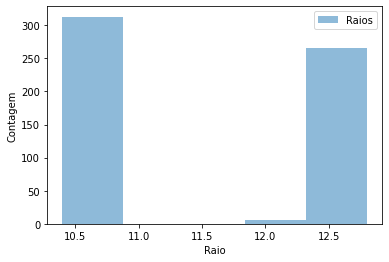

In [1]:
#try:
#    import cv2 as cv
#except ModuleNotFoundError:
#    import sys
#    !{sys.executable} -m pip install opencv-python
#    import cv2 as cv

import cv2 as cv
import numpy as np
import pandas as pd

def main():
    filename = 'GC_01.tif' #Define o nome do arquivo da imagem a ser analisada.
    # Carrega a imagem
    orig = cv.imread(cv.samples.findFile(filename), cv.IMREAD_COLOR) #Salva na variável orig a imagem original.
    src = cv.imread(cv.samples.findFile(filename), cv.IMREAD_COLOR) #Salva a imagem que será manipulada na variável 
                                                                    #src, assim temos a original e a manipulada 
                                                                    #separadamente.
    
    gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY) #Transforma a imagem em preto e branco.
        
    gray = cv.medianBlur(gray, 5) #Aplica o filtro Gaussiano, neste caso com um desvio padrão de 9 pixels.
        
    circles = cv.HoughCircles(gray,                       #Chama a função HoughCircles, na imagem filtrada.
                              method=cv.HOUGH_GRADIENT,   #Define o método Hough Gradient para buscar os círculos.
                              dp=2.0,                     #Utiliza metade da resolução para encontrar os círculos.
                              minDist=8,                 #Define uma distância mínima de 30 pixels entre os centros dos círculos.
                              param1=80,                 #Define o parâmetro a ser passado para o algoritmo de encontrar contornos.
                              param2=40,                  #Define o parâmetro para a definição final dos círculos.
                              minRadius=8,               #Define o raio mínimo dos círculos.
                              maxRadius=14)               #Define o raio máximo dos círculos.
    
    circle_inf = np.transpose(circles[0]) #Calcula a transposta das informações dos círculos, para 
                                          #calcularmos a média e desvio padrão.
        
    df = pd.DataFrame(circle_inf[2], columns = ['Raios']) #Converte os raios para um dataframe.
    ax = df.plot.hist(bins=5, alpha=0.5) #Armazena no eixo ax o histograma de raios.
    ax.set_xlabel("Raio") #Define o rótulo do eixo-x.
    ax.set_ylabel("Contagem") #Define o rótulo do eixo-y.

    if circles is not None: #Caso círculos tenham sido encontrados, executa o código a seguir:
        print('O raio médio é de', np.average(circle_inf[2]), 'pixels') #Calcula e exibe o raio médio dos círculos.
        print('O desvio padrão do raio médio é de', np.std(circle_inf[2]), 'pixels') #Calcula e exibe o desvio 
                                                                                 #padrão dos raios dos círculos.
        circles = np.uint16(np.around(circles)) #Arredonda as informações dos círculos para inteiros e
                                                #transforma em uma variável inteira de 16 bits. Isso é
                                                #necessário, pois não existem valores não inteiros de pixels.
        for i in circles[0, :]: #Realiza um loop para todos os círculos encontrados.
            center = (i[0], i[1])  #Define o centro do círculo na variável center
            cv.circle(src, center, 1, (0, 100, 100), 2) #Aplica a variável center no cv.circle, para que
                                                        #o centro do círculo seja desenhado, o raio é definido
                                                        #como 1, para mostrar apenas um ponto no centro.
                                                        #A cor é definida na escala RGB, pelo vetor (0, 100, 100)
                                                        #A largura da linha é definida pelo último parâmetro
                                                        #neste caso 3 pixels.
            radius = i[2] #Define o raio do círculo na variável radius.
            cv.circle(src, center, radius, (255, 0, 255), 1) #Agora sim aplica-se o raio e o centro para desenhar
                                                             #o círculo encontrado. A cor e largura da linha são
                                                             #definidas da mesma maneira que a explicada para o centro.
    
    cv.imshow("Original", orig) #Mostra a imagem original
    cv.imshow("Processed", gray) #Mostra a imagem com o filtro Gaussiano aplicado
    cv.imshow("detected circles", src) #Mostra a imagem com os círculos detectados.
    cv.waitKey(0) #Espera que uma tecla seja pressionada.
    cv.destroyAllWindows() #Fecha as janelas após pressionar qualquer tecla.

    
    return 0
if __name__ == "__main__":
    main() 

## Considerações finais

Perfeito, agora vocês tem o raio médio em pixels e seu desvio. Como saber o raio em nanometros agora? Notem que a imagem de vocês tem uma barra de escala, a partir disso vocês podem determinar o tamanho de cada pixel.

**Como o tamanho encontrado se compara com o encontrado no ImageJ?**

**Como o tamanho encontrado se compara com o encontrado no DLS?**